# Level 1

## Challenge 1

Domains: Forensics

We've sent the following secret message on a secret channel.

Submit your flag in this format: TISC{decoded message in lower case}

In [216]:
from scipy.io import wavfile
from matplotlib import pyplot as plt

import numpy as np

### Find channels

In [217]:
fs, data = wavfile.read('file1.wav')
print(f"Number of channels: {data.shape[1]}")

Number of channels: 2


Text(0.5, 1.0, 'Channel 2')

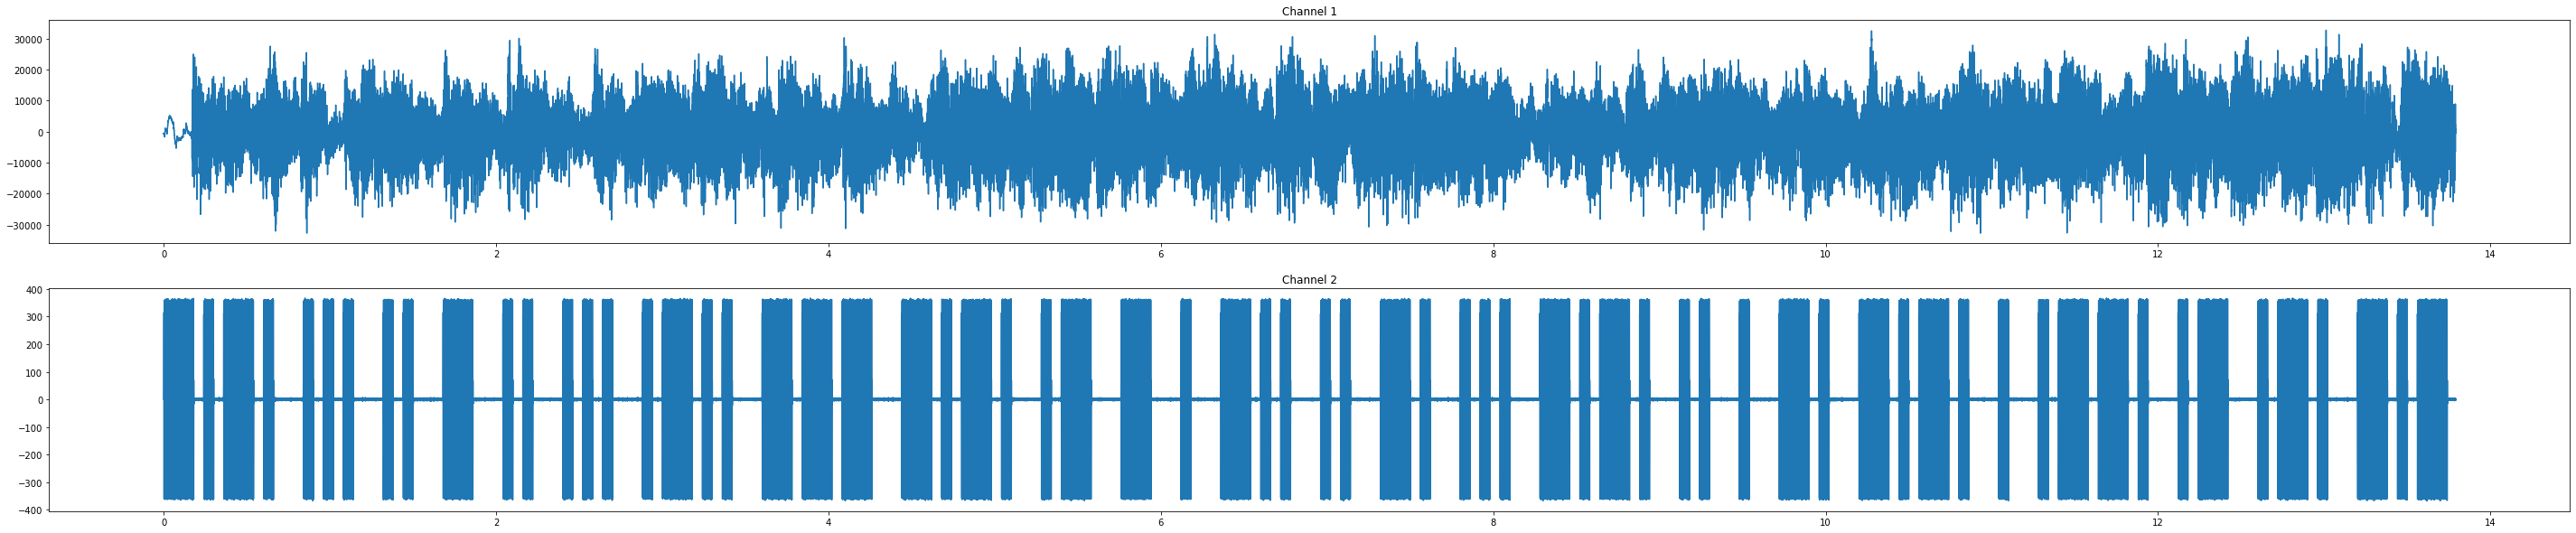

In [218]:
time = np.linspace(0, data.shape[0]/fs, data.shape[0])

fig, ax = plt.subplots(2, 1, figsize=(50, 10))

ax[0].plot(time, data[:, 0])
ax[0].set_title("Channel 1")
ax[1].plot(time, data[:, 1])
ax[1].set_title("Channel 2")

### Normalise data

Graph data is then manually converted to morse code.

Text(0.5, 1.0, 'Channel 2')

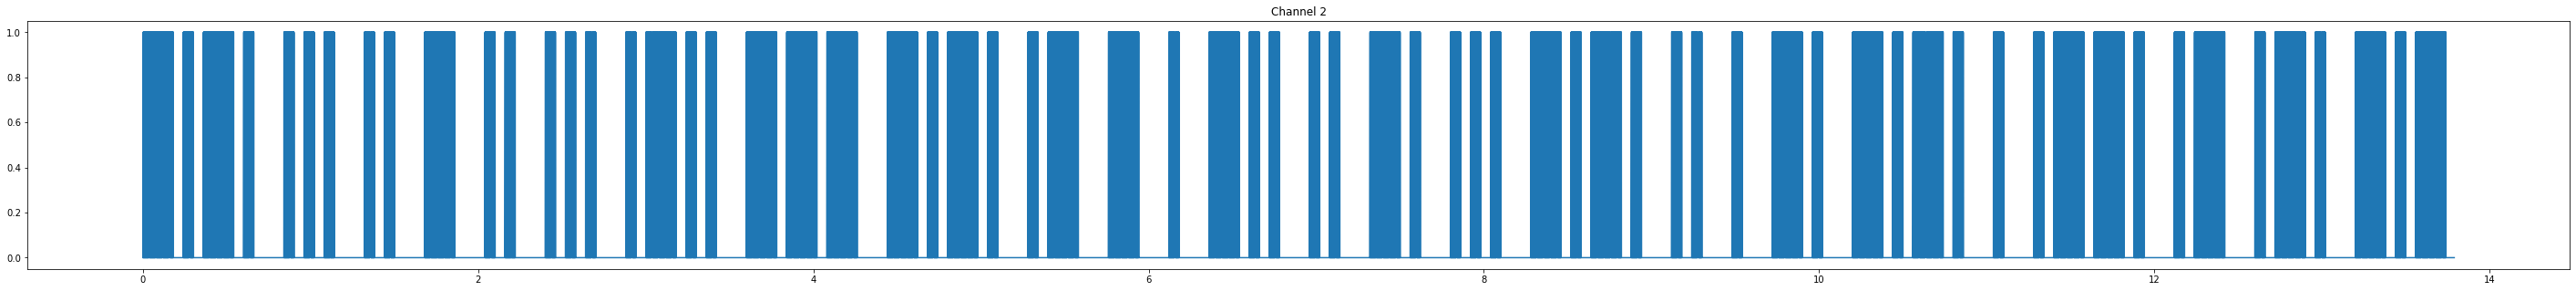

In [219]:
morse_binary = np.where(np.abs(data[:, 1]) > 50, 1, 0)

plt.figure(figsize=(50, 5))
ax = plt.axes()
ax.plot(time, morse_binary)
ax.set_title("Channel 2")

## Challenge 2

Domains: Forensics

This is a generic picture. What is the modify time of this photograph?

Submit your flag in the following format: TISC{YYYY:MM:DD HH:MM:SS}


In [220]:
from PIL import Image
from PIL.ExifTags import TAGS

### Find metadata

In [221]:
with Image.open('file2.jpg') as im:
    for tag_id in im.getexif():
        tag = TAGS.get(tag_id, tag_id)

        if tag != 'DateTime':
            continue
        
        print("TISC{" + im.getexif()[tag_id] + "}")

TISC{2003:08:25 14:55:27}


## Challenge 3

Domains: Forensics, Cryptography

Nothing unusual about the Singapore logo right?

Submit your flag in the following format: TISC{ANSWER}

In [222]:
import string

### Convert file to printable strings

In [223]:
def file_to_string(filename):
    
    result = []
    strings = []

    with open(filename, errors="ignore") as f:
        for c in f.read():
            if c in string.printable:
                result.append(c.strip())
                continue

            if len(result) >= 4 and not all(char == '' for char in result):
                strings.append(''.join(result))
            
            result.clear()

    return strings

In [229]:
file3 = file_to_string('file3.jpg')
print(file3)

['JFIF', ")/'%'/9339GDG]]}", ")/'%'/9339GDG]]}", '-atzR', 't\\Wn', '0Y=?', 'k]zo', 'iwOa', '1u/3=]', 'nz~', 'S|~:', "'{+qAt", '!&n7', 'x#)#P', 'V1|]', 'jsc"', "/k}'Cd", 'xyN]*W', 'u:kL', 'KyJbrm<tye\\', '-BE[#o>@', 'S5s@', 'A`2$', 'Xl6l6', 'v;|=]', '8fe$^I2?k59$pDRFfOO5', 'F($-TDdD38P%', '$?0$', 'K5!bI^uMS', "'*mls", 'g0[y', 'TczUP', '#%X!WaN', 'bT\\W1', '*S~]{', 'TPK,}3', '%HjE', '%_k;Gh', '1^0ElU', '#PjA5', 'P9SdJQK100Zo!', ',{"L>uhm7`2*fDlkNud', 'PjA5', '4`Xj=Q', "K%'wRbdI", 'u)PK~PT2Ze', '1~%M', 'yM2', 'PjA5', '(:&1qq(D', 'OPRRGj")', 'd/#Z5', '!^I)', "f'=b1gKHq", 'aaW', "Np-]'80&N", '_GY"CJ', 'xz%=', 'QjpM%Br:\\G5', 'PjA5', 'j=|]%)VI', "'/_bK", '0JU', "PjA'}4", '&)(QEU^Y&1F:]', 'XhOM1', 'nL:[83838yfplEptaN', 'K.bFr&UJl', "h'V", 'Dr-ck', 'XZ"9', 'Er)c*', 'XR"9', '8NZs', '(IK)7IfW2I', ':kfv3$', 'j"22', '6"', 'Lg\\q7Ol;dEr12=', '2MW!qD6+xF{z;F', 'o:LMGqc&', 'n.)&KvBk', 'En6/cyY', '$4N', '<,J{L', '^#+R<sk', '2I"', '][D02U', '3=/I', 'b*P9', '=N#IUI*e;', 'UNROl)gsfk', '2\\.*B$!', 'HLTKIH

### Extract file from JPEG

In [225]:
!unzip file3.jpg

Archive:  file3.jpg
warning [file3.jpg]:  7184 extra bytes at beginning or within zipfile
  (attempting to process anyway)
  inflating: picture_with_text.jpg   


In [226]:
picture_with_text = file_to_string(file3[-1])
print(picture_with_text)

['NAFJREGBGUVFPUNYYRATRVFURERNCCYRPNEEBGCRNE', 'JFIF', ")/'%'/9339GDG]]}", ")/'%'/9339GDG]]}", '-atzR', 't\\Wn', '0Y=?', 'k]zo', 'iwOa', '1u/3=]', 'nz~', 'S|~:', "'{+qAt", '!&n7', 'x#)#P', 'V1|]', 'jsc"', "/k}'Cd", 'xyN]*W', 'u:kL', 'KyJbrm<tye\\', '-BE[#o>@', 'S5s@', 'A`2$', 'Xl6l6', 'v;|=]', '8fe$^I2?k59$pDRFfOO5', 'F($-TDdD38P%', '$?0$', 'K5!bI^uMS', "'*mls", 'g0[y', 'TczUP', '#%X!WaN', 'bT\\W1', '*S~]{', 'TPK,}3', '%HjE', '%_k;Gh', '1^0ElU', '#PjA5', 'P9SdJQK100Zo!', ',{"L>uhm7`2*fDlkNud', 'PjA5', '4`Xj=Q', "K%'wRbdI", 'u)PK~PT2Ze', '1~%M', 'yM2', 'PjA5', '(:&1qq(D', 'OPRRGj")', 'd/#Z5', '!^I)', "f'=b1gKHq", 'aaW', "Np-]'80&N", '_GY"CJ', 'xz%=', 'QjpM%Br:\\G5', 'PjA5', 'j=|]%)VI', "'/_bK", '0JU', "PjA'}4", '&)(QEU^Y&1F:]', 'XhOM1', 'nL:[83838yfplEptaN', 'K.bFr&UJl', "h'V", 'Dr-ck', 'XZ"9', 'Er)c*', 'XR"9', '8NZs', '(IK)7IfW2I', ':kfv3$', 'j"22', '6"', 'Lg\\q7Ol;dEr12=', '2MW!qD6+xF{z;F', 'o:LMGqc&', 'n.)&KvBk', 'En6/cyY', '$4N', '<,J{L', '^#+R<sk', '2I"', '][D02U', '3=/I', 'b*P9', 

### Decode Caesar Cipher

In [227]:
decoded = []

for shift in range(1, 14):
    answer = []

    for char in picture_with_text[0]:
        answer.append(chr((ord(char) + shift-65) % 26 + 65))

    answer_string = ''.join(answer)
    decoded.append(answer_string)
    print(f"Shift: +{shift}")
    print(f"{answer_string}\n")

Shift: +1
OBGKSFHCHVWGQVOZZSBUSWGVSFSODDZSQOFFCHDSOF

Shift: +2
PCHLTGIDIWXHRWPAATCVTXHWTGTPEEATRPGGDIETPG

Shift: +3
QDIMUHJEJXYISXQBBUDWUYIXUHUQFFBUSQHHEJFUQH

Shift: +4
REJNVIKFKYZJTYRCCVEXVZJYVIVRGGCVTRIIFKGVRI

Shift: +5
SFKOWJLGLZAKUZSDDWFYWAKZWJWSHHDWUSJJGLHWSJ

Shift: +6
TGLPXKMHMABLVATEEXGZXBLAXKXTIIEXVTKKHMIXTK

Shift: +7
UHMQYLNINBCMWBUFFYHAYCMBYLYUJJFYWULLINJYUL

Shift: +8
VINRZMOJOCDNXCVGGZIBZDNCZMZVKKGZXVMMJOKZVM

Shift: +9
WJOSANPKPDEOYDWHHAJCAEODANAWLLHAYWNNKPLAWN

Shift: +10
XKPTBOQLQEFPZEXIIBKDBFPEBOBXMMIBZXOOLQMBXO

Shift: +11
YLQUCPRMRFGQAFYJJCLECGQFCPCYNNJCAYPPMRNCYP

Shift: +12
ZMRVDQSNSGHRBGZKKDMFDHRGDQDZOOKDBZQQNSODZQ

Shift: +13
ANSWERTOTHISCHALLENGEISHEREAPPLECARROTPEAR



In [228]:
print("TISC{" + decoded[-1][-15:] + "}")

TISC{APPLECARROTPEAR}
